In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
from neuralplayground.experiments import Wernle2018Data, Hafting2008Data, Sargolini2006Data
from neuralplayground.comparison import GridScorer
from neuralplayground.saved_model import fetch_model_path
from neuralplayground.plotting.plot_utils import make_plot_trajectories , make_plot_rate_map, make_agent_comparison

# Different Agents in Same env


## 2D env

/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/clementine/Documents/UCL/NeuralPlayground/neuralplayground/comparison/metrics.py:517: RuntimeWarning: All-NaN slice encountered
  in_range = (np.nanmin(image), np.nanmax(image))
/Users/clementine/Documents/UCL/NeuralPlayground/neuralplayground/comparison/metrics.py:521: UserWarning: One or more intensity levels are NaN. Rescaling will broadcast NaN to the full image. Provide intensity levels yourself to avoid this. E.g. with np.nanmin(image), np.nanmax(image).
  autoCorrMiddleRescaled = skimage.exposure.rescale_intensity(image, in_range, out_range)
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-pa

array([[<Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig9'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:nan'}, xlabel='width', ylabel='depth'>],
       [<Axes: title={'center': 'rat: 11015 sess: 13120410 tetrode: t5c1'}, xlabel='width', ylabel='depth'>,
        <Axes: >],
       [<Axes: title={'center': 'sac plot with gridscore:0.0098'}, xlabel='width', ylabel='depth'>,
        <Axes: >]], dtype=object)

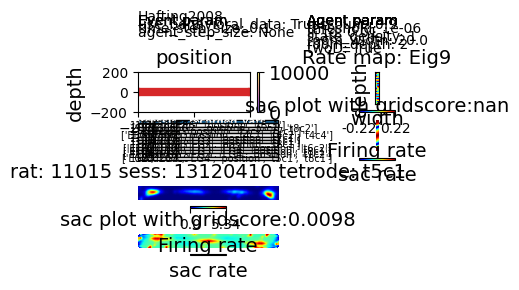

In [3]:


data_path = fetch_model_path("stachenfeld_2018_in_Hafting2008")

agent_path = data_path + 'run_0_22-07-2023_14-06-26-940/agent'
param_path = data_path + 'run_0_22-07-2023_14-06-26-940/params.dict'
arena_path = data_path + 'run_0_22-07-2023_14-06-26-940/arena'

agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)

agents=[agent_sr]
parameters=[param_sr]
env=[env]

make_agent_comparison(env, parameters,agents,recording_index=0,GridScorer=GridScorer)


# upload the zip of the run directly 

/Users/clementine/Documents/UCL/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig15'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-1.1191'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.1237'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.3843'}, xlabel='width', ylabel='depth'>]],
      dtype=object)

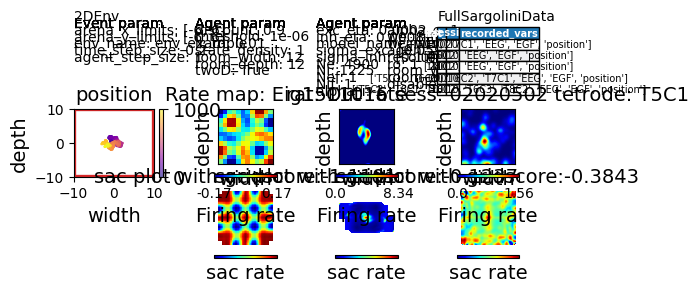

In [4]:
# agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_0_22-07-2023_14-00-45-359/agent"
# param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_0_22-07-2023_14-00-45-359/params.dict"
# arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_0_22-07-2023_14-00-45-359/arena"


data_path = fetch_model_path("stachenfeld_2018_in_simple2D")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)

#agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_0_22-07-2023_14-00-05-141/agent"
#param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_0_22-07-2023_14-00-05-141/params.dict"
#arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_0_22-07-2023_14-00-05-141/arena"

data_path = fetch_model_path("weber_2018_in_simple2D")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'



env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


agents=[agent_sr,agent]
parameters=[param_sr,param]
exp = Sargolini2006Data(verbose=False)
env=[env]
exp=[exp]

make_agent_comparison(env, parameters,agents, exps=exp , recording_index=0,GridScorer=GridScorer)


## Sargolini env

In [ ]:
#agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_22-07-2023_14-02-02-394/agent"
#param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_22-07-2023_14-02-02-394/params.dict"
#arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_22-07-2023_14-02-02-394/arena"

data_path = fetch_model_path("stachenfeld_2018_in_Sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)

#agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/agent"
#param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/params.dict"
#arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/arena"

data_path = fetch_model_path("weber_2018_in_Sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


agents=[agent_sr,agent]
parameters=[param_sr,param]
exp = Sargolini2006Data(verbose=False)
env=[env]

make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)


  2%|▉                                    | 13.3M/549M [01:09<1:01:50, 144kB/s]

## Hafting env

In [ ]:
#agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Hafting2008/run_0_22-07-2023_14-06-26-940/agent"
#param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Hafting2008/run_0_22-07-2023_14-06-26-940/params.dict"
#arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Hafting2008/run_0_22-07-2023_14-06-26-940/arena"


data_path = fetch_model_path("stachenfeld_2018_in_Hafting2008")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env_sr = pd.read_pickle(arena_path)



#agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Hafting2008/run_0_22-07-2023_14-07-33-242/agent"
#param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Hafting2008/run_0_22-07-2023_14-07-33-242/params.dict"
#arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Hafting2008/run_0_22-07-2023_14-07-33-242/arena"


data_path = fetch_model_path("weber_2018_in_Hafting2008")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)

agents=[agent_sr,agent]
parameters=[param_sr,param]
env=[env_sr,env]


make_agent_comparison(env, parameters,agents,  recording_index=0,GridScorer=GridScorer)



## Wernle 

# Train same agent in Different envs


## Weber

In [ ]:
# Different Seed
data_path = fetch_model_path("weber_2018_in_Hafting2008")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


env_H = pd.read_pickle(arena_path)
agent_H = pd.read_pickle(agent_path)
param_H = pd.read_pickle(param_path)

#agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_0_22-07-2023_14-00-05-141/agent"
#param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_0_22-07-2023_14-00-05-141/params.dict"
#arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_0_22-07-2023_14-00-05-141/arena"

data_path = fetch_model_path("weber_2018_in_simple2D")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_2d = pd.read_pickle(agent_path)
param_2d = pd.read_pickle(param_path)
env_2d = pd.read_pickle(arena_path)

# Different Seed
#agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Hafting2008/run_0_22-07-2023_14-07-33-242/agent"
#param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Hafting2008/run_0_22-07-2023_14-07-33-242/params.dict"
#arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Hafting2008/run_0_22-07-2023_14-07-33-242/arena"

data_path = fetch_model_path("weber_2018_in_Hafting2008")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


env_H = pd.read_pickle(arena_path)
agent_H = pd.read_pickle(agent_path)
param_H = pd.read_pickle(param_path)

# Different Env
#agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/agent"
#param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/params.dict"
#arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/arena"

data_path = fetch_model_path("weber_2018_in_Sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)



agents=[agent_2d,agent,agent_H]
parameters=[param_2d,param,param_H]
env=[env_2d,env, env_H]



make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)




## Stackenfeld

In [ ]:
#agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_0_22-07-2023_14-00-45-359/agent"
#param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_0_22-07-2023_14-00-45-359/params.dict"
#arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_0_22-07-2023_14-00-45-359/arena"

data_path = fetch_model_path("stachenfeld_2018_in_simple2D")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_2d = pd.read_pickle(agent_path)
param_2d = pd.read_pickle(param_path)
env_2d = pd.read_pickle(arena_path)



#agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_22-07-2023_14-02-02-394/agent"
#param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_22-07-2023_14-02-02-394/params.dict"
#arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_22-07-2023_14-02-02-394/arena"

data_path = fetch_model_path("stachenfeld_2018_in_Sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_S = pd.read_pickle(agent_path)
param_S = pd.read_pickle(param_path)
env_S = pd.read_pickle(arena_path)

#agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Hafting2008/run_0_22-07-2023_14-06-26-940/agent"
#param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Hafting2008/run_0_22-07-2023_14-06-26-940/params.dict"
#arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Hafting2008/run_0_22-07-2023_14-06-26-940/arena"

data_path = fetch_model_path("stachenfeld_2018_in_Hafting2008")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_sh = pd.read_pickle(agent_path)
param_sh = pd.read_pickle(param_path)
env_sh = pd.read_pickle(arena_path)



agents=[agent_2d,agent_S,agent_sh]
parameters=[param_2d,param_S,aram_sh]
env=[env_2d,env_S,env_sh]


make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)


# Merging Room environment


In [ ]:
#agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Merging_Room/run_4_11-07-2023_20-19-19-306/agent"
#param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Merging_Room/run_4_11-07-2023_20-19-19-306/params.dict"
#arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Merging_Room/run_4_11-07-2023_20-19-19-306/arena"

data_path = fetch_model_path("weber_2018_in_Merging_Room")


agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'



env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


# Different Env
#agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Wernle/run_0_22-07-2023_14-08-12-768/agent"
#param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Wernle/run_0_22-07-2023_14-08-12-768/params.dict"
#arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Wernle/run_0_22-07-2023_14-08-12-768/arena"

data_path = fetch_model_path("weber_2018_in_Wernle")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'



agent_W = pd.read_pickle(agent_path)
param_W = pd.read_pickle(param_path)
env_W = pd.read_pickle(arena_path)


agents=[agent_W,agent]
parameters=[param_W,param]
env=[env_W, env]
make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)








## Comparison from run agent

In [ ]:
from neuralplayground.agents import  Stachenfeld2018
from neuralplayground.arenas import Simple2D, MergingRoom, Sargolini2006, Hafting2008, BasicSargolini2006,Wernle2018
from neuralplayground.backend import default_training_loop, episode_based_training_loop


stachenfeld_in_2d_params = {
    "simulation_id": "stachenfeld_2018_in_simple2D",
    "agent_class": Stachenfeld2018,
    "env_class": Simple2D,
    "env_params": {
        "arena_x_limits": [-6, 6],
        "arena_y_limits": [-6, 6],
        "env_name": "env_example",
        "time_step_size": 0.2,
        "agent_step_size": 1,
    },
    "agent_params": {
        "discount": 0.9,
        "threshold": 1e-6,
        "lr_td": 1e-2,
        "state_density": 1,
        "room_width": 12,
        "room_depth": 12,
        "twoD": True,
    },
    "training_loop": episode_based_training_loop,
    "training_loop_params": {"t_episode": 1000, "n_episode": 100},
}

agent =  Stachenfeld2018(discount=stachenfeld_in_2d_params["agent_params"]["discount"], t_episode=stachenfeld_in_2d_params["training_loop_params"]["t_episode"], n_episode=stachenfeld_in_2d_params["training_loop_params"]["n_episode"], threshold= stachenfeld_in_2d_params["agent_params"]["threshold"], lr_td=stachenfeld_in_2d_params["agent_params"]["lr_td"],
               room_width=stachenfeld_in_2d_params["agent_params"]["room_width"], room_depth=stachenfeld_in_2d_params["agent_params"]["room_depth"], state_density= stachenfeld_in_2d_params["agent_params"]["state_density"],twoD=stachenfeld_in_2d_params["agent_params"]["twoD"])


room_width = [-6,6]
room_depth = [-6,6]
env_name = "env_example"
time_step_size = 0.2
agent_step_size = 1
# Init environment

env = Simple2D(environment_name=stachenfeld_in_2d_params["env_params"]["env_name"],
               arena_x_limits = stachenfeld_in_2d_params["env_params"]["arena_x_limits"],
               arena_y_limits = stachenfeld_in_2d_params["env_params"]["arena_y_limits"],
               time_step_size = stachenfeld_in_2d_params["env_params"]["time_step_size"] ,
               agent_step_size = stachenfeld_in_2d_params["env_params"]["agent_step_size"])

agents=[agent]
parameters=[stachenfeld_in_2d_params]
env=[env]

make_agent_comparison(env, parameters,agents,GridScorer=GridScorer)